# Advanced Machine Learning - Assignment #1
## U.N. World Happiness Data Report
Cheng Man  
2020/02/11



## Report Objective: Predict World Happiness Rankings 

What makes the citizens of one country more happy than the citizens of other countries?  Do variables measuing perceptions of corruption, GDP, maintaining a healthy lifestyle, or social support associate with a country's happiness ranking?  

This report uses the United Nation's World Happiness Rankings country level data to experiment with models that predict happiness rankings well.


---

**Data**: 2019 World Happiness Survey Rankings + ISO-3166-Countries-with-Regional-Codes

**Features**

*   Region
*   GDP per capita
*   Social support
*   Healthy life expectancy
*   Freedom to make life choices
*   Generosity
*   Perceptions of corruption

**Target**
*   Happiness_level (Very High = Top 20% and Very Low = Bottom 20%)

Source: https://worldhappiness.report/;  
        https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv

## Import Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data=pd.read_csv("worldhappiness2019_r.csv")

data.head()

,Happiness_level,Country or region,Region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Very High,Australia,Oceania,1.372,1.548,1.036,0.557,0.332,0.290
1,Very High,Austria,Europe,1.376,1.475,1.016,0.532,0.244,0.226
2,Very High,Belgium,Europe,1.356,1.504,0.986,0.473,0.160,0.210
3,Very High,Canada,Americas,1.365,1.505,1.039,0.584,0.285,0.308
4,Very High,Chile,Americas,1.159,1.369,0.920,0.357,0.187,0.056


## Explore bivariate results by Visualization

### 1. The relationship between Happiness and GDP per capita

---

From the box plot below, people can see that from *Very High* level of happiness to *Very Low* level, countries tend to have less *GDP per capita*. 
 
**The higher the *GDP per capita*, the higher level the *Happiness* is**

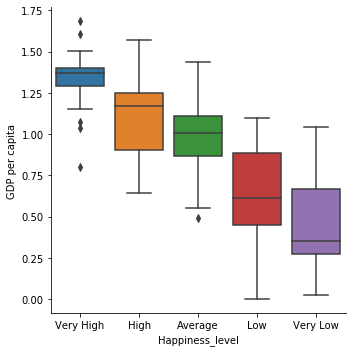

In [0]:
import seaborn as sns

sns.catplot(x='Happiness_level', y="GDP per capita", kind="box", data=data)

### 2. The relationship between Happiness and Social support

---

From the box plot below, people can see that from *Very High* level of happiness to *Very Low* level, countries tend to have less *Social support*. 
   
**The higher the *Social support*, the higher level the *Happiness* is**

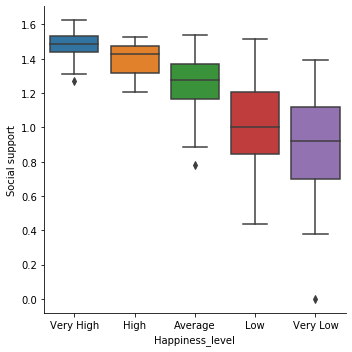

In [0]:
sns.catplot(x='Happiness_level', y="Social support", kind="box", data=data)

### 3. The relationship between Happiness and Healthy life expectancy

---

From the box plot below, people can see that from *Very High* level of happiness to *Very Low* level, countries tend to have less *Healthy life expectancy*. 
   
**The higher the *Healthy life expectancy*, the higher level the *Happiness* is**

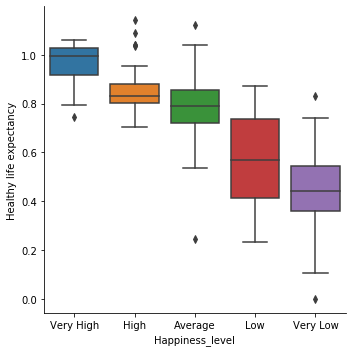

In [0]:
sns.catplot(x='Happiness_level', y="Healthy life expectancy", kind="box", data=data)

### 4. The relationship between Happiness and Freedom to make life choices

---

From the box plot below, people can see that from *Very High* level of happiness to *Very Low* level, countries tend to have less *Freedom to make life choices*. 
   
**The higher the *Freedom to make life choices*, the higher level the *Happiness* is**

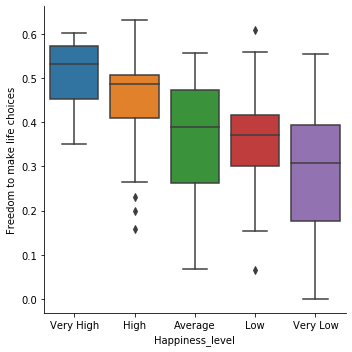

In [0]:
sns.catplot(x='Happiness_level', y="Freedom to make life choices", kind="box", data=data)

### 5. The relationship between Happiness and Generosity

---

From the box plot below, people can see that from *Very High* level of happiness to *Very Low* level, countries's *Generosity* point fall down at first but increase at last. 
   
**There could be a quadratic relationship between *Happiness* and *Generosity***

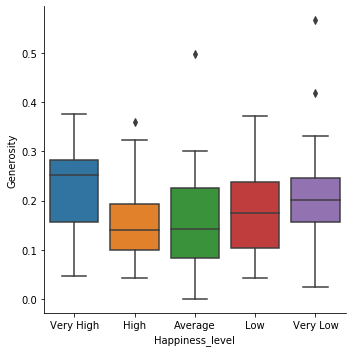

In [0]:
sns.catplot(x='Happiness_level', y="Generosity", kind="box", data=data)

### 6. The relationship between Happiness and Perceptions of corruption

---

From the box plot below, people can see that comparing the *Very High* Happiness level countries to others, they have much higher Perceptions of corruption.
   
**Those countries having Very High level of *Happiness* tend to have higher *Perceptions of corruption*, compared to other countries**

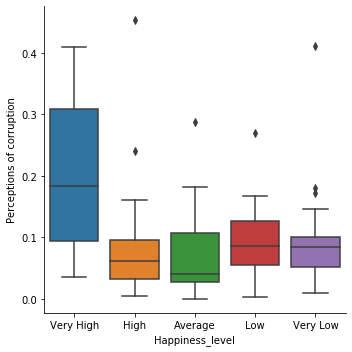

In [0]:
sns.catplot(x='Happiness_level', y="Perceptions of corruption", kind="box", data=data)

### 7. The relationship between Happiness and Region

---

From the plot below, people can see that for Very High Happiness countries, most of them are in Europe. There is no country in Africa which has a Very High level of Happiness, indeed, most African countires are in Low or Very Low level. Also, American countries are like those in Europe, that most of them are in High level; while most Asian countries stay at the Average level of Happiness.

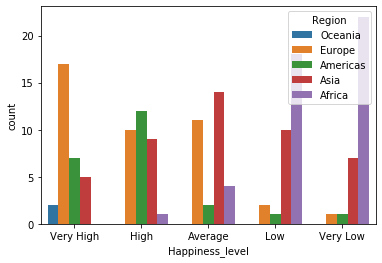

In [0]:
sns.countplot(x="Happiness_level", hue="Region", data=data)

## Build a model to predict happiness rankings

In [48]:
# Set up training and test data
from sklearn.model_selection import train_test_split

y=data['Happiness_level']
X=data.drop(['Happiness_level', 'Country or region'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_train.columns.tolist())

(117, 7)
(117,)
['Region', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']


## Examine feature importance

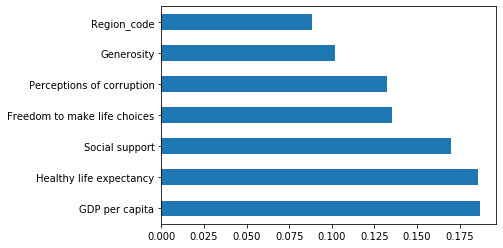

array([0.18709492, 0.16972113, 0.18577133, 0.13519443, 0.10162471,
       0.1325214 , 0.08807209])

In [0]:
from sklearn.preprocessing import LabelEncoder

#Lable the Column 'Region'
lb_make = LabelEncoder()
X["Region_code"] = lb_make.fit_transform(X["Region"])

#Examine Feature Importance by ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

X_num = X.drop(['Region'], axis=1)

model = ExtraTreesClassifier()
model.fit(X_num,pd.get_dummies(y))

feat_importances = pd.Series(model.feature_importances_, index=X_num.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()
model.feature_importances_



The graph above shows the importance of each feature.  


> People can see that **GDP per capita**, **Healthy life expectancy** and **Social support** are the most important features to predict **Happiness**.

>At the same time, **Region** and **Generosity** are less important than others.

## Preprocess data using Column Transformer and save fit preprocessor to ".pkl" file

In [0]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

#Preprocessing Pipeline for Numeric features
numeric_features=X.columns.tolist()
numeric_features.remove('Region')

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

#Preprocessing Pipeline for Categorical feature
categorical_features = ['Region']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

#Final Preprocessor Object
preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features),
                  ('cat', categorical_transformer, categorical_features)])

#Fit the Preprocessor Object
prediction_input_preprocessor=preprocessor.fit(X_train)

#Saving Preprocessor Object with pickle
import pickle
pickle.dump(prediction_input_preprocessor, open("preprocessor.pkl", "wb" ))

In [0]:
#Check the shape of X_train
prediction_input_preprocessor.transform(X_train).shape

(117, 11)

In [49]:
#Check the shape of y_train
y_train.shape

(117,)

## Prediction Model #1 - A Neural Network with Keras

### 1.1 Build the model

In [60]:
#Using Grid Search to Find Better Parameters
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adadelta

def create_model(optimizer="Adadelta"):
	# create model
  model = Sequential()
  model.add(Dense(150, input_dim=11, activation='relu'))
  model.add(Dense(100, activation='relu'))

  model.add(Dense(5, activation='softmax'))
  
  ada = Adadelta(lr=0.1, rho=0.95)
  
  # Compile model
  model.compile(loss='categorical_crossentropy', optimizer=ada, metrics=['accuracy'])
  return model

seed = 15
np.random.seed(seed)

model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [60, 80, 100]
epochs = [500, 700, 1300]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(prediction_input_preprocessor.transform(X_train), y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.504274 using {'batch_size': 60, 'epochs': 500}
0.504274 (0.024175) with: {'batch_size': 60, 'epochs': 500}
0.444444 (0.048349) with: {'batch_size': 60, 'epochs': 700}
0.487179 (0.041872) with: {'batch_size': 60, 'epochs': 1300}
0.452991 (0.063960) with: {'batch_size': 80, 'epochs': 500}
0.470085 (0.043581) with: {'batch_size': 80, 'epochs': 700}
0.452991 (0.067299) with: {'batch_size': 80, 'epochs': 1300}
0.435897 (0.055391) with: {'batch_size': 100, 'epochs': 500}
0.478632 (0.048349) with: {'batch_size': 100, 'epochs': 700}
0.427350 (0.031980) with: {'batch_size': 100, 'epochs': 1300}


In [61]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adadelta

def create_model():
	# create model
  model = Sequential()
  model.add(Dense(150, input_dim=11, activation='relu'))
  model.add(Dense(100, activation='relu'))

  model.add(Dense(5, activation='softmax'))
  
  ada = Adadelta(lr=0.1, rho=0.95)

  # Compile model
  model.compile(loss='categorical_crossentropy', optimizer=ada, metrics=['accuracy'])
  return model

seed = 15
np.random.seed(seed)

model1 = KerasClassifier(build_fn=create_model, batch_size=60, epochs=500, validation_split=0, verbose=0 )
model1.fit(prediction_input_preprocessor.transform(X_train), y_train)

### 1.2 Evaluate the model

In [0]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import pandas as pd
from math import sqrt

def model_eval_metrics(y_true, y_pred,classification="TRUE"):
     if classification=="TRUE":
        accuracy_eval = accuracy_score(y_true, y_pred)
        f1_score_eval = f1_score(y_true, y_pred,average="macro",zero_division=0)
        precision_eval = precision_score(y_true, y_pred,average="macro",zero_division=0)
        recall_eval = recall_score(y_true, y_pred,average="macro",zero_division=0)
        mse_eval = 0
        rmse_eval = 0
        mae_eval = 0
        r2_eval = 0
        metricdata = {'accuracy': [accuracy_eval], 'f1_score': [f1_score_eval], 'precision': [precision_eval], 'recall': [recall_eval], 'mse': [mse_eval], 'rmse': [rmse_eval], 'mae': [mae_eval], 'r2': [r2_eval]}
        finalmetricdata = pd.DataFrame.from_dict(metricdata)
     else:
        accuracy_eval = 0
        f1_score_eval = 0
        precision_eval = 0
        recall_eval = 0
        mse_eval = mean_squared_error(y_true, y_pred)
        rmse_eval = sqrt(mean_squared_error(y_true, y_pred))
        mae_eval = mean_absolute_error(y_true, y_pred)
        r2_eval = r2_score(y_true, y_pred)
        metricdata = {'accuracy': [accuracy_eval], 'f1_score': [f1_score_eval], 'precision': [precision_eval], 'recall': [recall_eval], 'mse': [mse_eval], 'rmse': [rmse_eval], 'mae': [mae_eval], 'r2': [r2_eval]}
        finalmetricdata = pd.DataFrame.from_dict(metricdata)
     return finalmetricdata

In [62]:
y_pred=model1.predict(prediction_input_preprocessor.transform(X_test))

modelevalobject=model_eval_metrics(y_test,y_pred,classification="TRUE")
modelevalobject

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.717949,0.717857,0.717857,0.727778,0,0,0,0


### 1.3 Discussion for hyper-parameter values

---

In this Keras Deep Learning Model, there are multiple parameters:

1.  Optimizer  
    I instantiated an optimizer before passing it to the `model.compile()`, and I choose `Adadelta()` as the optimizer. From the `Keras` Document, "Adadelta is a more robust extension of `Adagrad` that adapts learning rates based on a moving window of gradient updates, instead of accumulating all past gradients. This way, Adadelta continues learning even when many updates have been done."  
    People can find the document about optimizer in `Keras` from [this website](https://keras.io/optimizers/).  
    Choosing Adadelta() gave me the best test scores compared to other optimizer like `SGD`, `Adam`, `Adamax`, etc. 

2.  Learning Rate `lr`   
    The learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function. When I instantiated the optimizer, I set up the learning rate in this model. The learning rate, which is `lr` in the code, is **0.1** this time. After setting that, I got a better result. 

3.  `batch_size`, `epochs` and `validation_split`  
    >The `batch_size` defines the number of samples that will be propagated through the network.   

    >The `epochs` means the number of epochs to train the model. An epoch is an iteration over the entire x and y data provided.  

    >The `validation_split` is the fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch.   

    I tried to run a `GridSearchCV` to find better `batch_size` and `epochs` for this model. For `validation_split`, I tried different values between **0 to 0.2**. Since the training data set is relatively small in this case, I decided to set it to **0**, and it gave me a better result.



### 1.4 Upload the model

In [0]:
! pip3 install keras2onnx
! pip3 install onnxruntime

In [0]:
#Convert keras model object to onnx and then save it to .onnx file
import pickle
pickle.dump(model1, open( "3sc_keras_model_r.pkl", "wb" ) )

In [0]:
import pickle

# Loading AWS keys necessary to submit model.  Loading to object, so we don't print them out in our notebook

aws_key_password_region = pickle.load(open("worldhappiness_modelsubmission_keys.pkl", "rb" )) 

In [0]:
apiurl="https://btuvanmi55.execute-api.us-east-1.amazonaws.com/prod/m"
username = "3scman"
password = "Man7mancheng"

region='us-east-1'
model_filepath="3sc_keras_model_r.pkl"   
preprocessor_filepath="preprocessor.pkl"
preprocessor="TRUE"

trainingdata=X_train

# Set aws keys for this project (these keys give you access to collaborate on a single project)

#Importing from object that stores keys so we do not print out keys for others to see.

aws_key_password_region = pickle.load(open( "worldhappiness_modelsubmission_keys.pkl", "rb" ) )

aws_key=aws_key_password_region[0]
aws_password=aws_key_password_region[1]
region=aws_key_password_region[2]

In [0]:
! pip3 install https://github.com/mikedparrott/aimodelshare/blob/master/aimodelshare-0.0.2.tar.gz?raw=true

In [0]:
# Submit your model using submit_model() function
# Works with models and preprocessors. 
import aimodelshare as ai

ai.submit_model(model_filepath=model_filepath, model_eval_metrics=modelevalobject,apiurl=apiurl, username=username, password=password, aws_key=aws_key,aws_password=aws_password, region=region, trainingdata=trainingdata,preprocessor_filepath=preprocessor_filepath,preprocessor=preprocessor)

In [0]:
# arguments required to get leaderboard below
apiurl="https://btuvanmi55.execute-api.us-east-1.amazonaws.com/prod/m"
username = "3scman"
password = "Man7mancheng"

In [72]:
import aimodelshare as ai
import pickle

# Loading AWS keys necessary to submit model.  Loading to object, so we don't print them out in our notebook

aws_key_password_region = pickle.load(open("worldhappiness_modelsubmission_keys.pkl", "rb" )) 
aws_key_password_region = pickle.load( open( "worldhappiness_modelsubmission_keys.pkl", "rb" ) )

aws_key=aws_key_password_region[0]
aws_password=aws_key_password_region[1]
region=aws_key_password_region[2]
leaderboard = ai.get_leaderboard(apiurl, username, password, aws_key, aws_password, region)

LEADERBOARD RANKINGS:


,accuracy,f1_score,precision,recall,mse,rmse,mae,r2,username,model_version,avg_ranking_classification,avg_ranking_regression
61,0.717949,0.717857,0.717857,0.727778,0,0,0,0,3scman,85,2.333333,1.0
14,0.717949,0.713796,0.719444,0.725000,0,0,0,0,3scman,70,2.333333,1.0
49,0.666667,0.675975,0.754286,0.700952,0,0,0,0,dhoward97,69,2.666667,1.0
80,0.692308,0.693333,0.700397,0.702778,0,0,0,0,3scman,62,4.000000,1.0
0,0.641026,0.642381,0.743590,0.682273,0,0,0,0,SUN-Wenjun,83,4.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.384615,0.343861,0.348889,0.422222,0,0,0,0,zivzach,50,29.333333,1.0
22,0.384615,0.303896,0.340260,0.425000,0,0,0,0,abhay_07,18,30.333333,1.0
5,0.333333,0.337698,0.385556,0.322222,0,0,0,0,username2,6,29.666667,1.0
38,0.333333,0.337698,0.385556,0.322222,0,0,0,0,username2,3,29.666667,1.0


## Prediction Model #2 - KNN

### 2.1 Build the model

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid_knn = {'n_neighbors': np.arange(1, 15),
                  'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid_knn)
grid_knn.fit(prediction_input_preprocessor.transform(X_train), y_train)
print("best mean cross-validation score: {:.3f}".format(grid_knn.best_score_))
print("best parameters: {}".format(grid_knn.best_params_))
print("test-set score: {:.3f}".format(grid_knn.score(prediction_input_preprocessor.transform(X_test), y_test)))

best mean cross-validation score: 0.522
best parameters: {'n_neighbors': 4, 'weights': 'distance'}
test-set score: 0.590


### 2.2 Evaluate the model

In [0]:
model2 = KNeighborsClassifier(n_neighbors=4,weights='distance')
model2.fit(prediction_input_preprocessor.transform(X_train), y_train)

y_pred=model2.predict(prediction_input_preprocessor.transform(X_test))

modelevalobject=model_eval_metrics(y_test,y_pred,classification="TRUE")
modelevalobject

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.589744,0.563651,0.56619,0.569444,0,0,0,0


### 2.3 Discussion for hyper-parameter values

---

The parameters in this KNN model include `n_neighbors` and `weights`. I used `GridSearchCV` to find the best parameter combination.  

> `n_neighbors`: Number of neighbors to use in the model. In this case, after grid search, the best value is **4**.  

> `weights`: There are two kinds of weights in a sklearn KNN model.  
1. `uniform` : uniform weights. All points in each neighborhood are weighted equally.  
2. `distance` : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. After grid search, the better method is `distance`.  

## Prediction Model #3 - Random Forest

### 3.1 Build the model

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

forest_param_grid = {'n_estimators': np.arange(100, 200, 300),
                     'max_depth': np.arange(1, 20)}
forest_grid = GridSearchCV(RandomForestClassifier(random_state = 20), forest_param_grid).fit(prediction_input_preprocessor.transform(X_train), y_train)

print("RANDOM FOREST (UNSCALED DATA)")
print("Test set Score: {:.3f}".format(forest_grid.score(prediction_input_preprocessor.transform(X_test), y_test)))
print("Best mean cross-validation score: {:.3f}".format(forest_grid.best_score_))
print("Best Parameter: {}".format(forest_grid.best_params_))

RANDOM FOREST (UNSCALED DATA)
Test set Score: 0.641
Best mean cross-validation score: 0.522
Best Parameter: {'max_depth': 11, 'n_estimators': 100}


### 3.2 Evaluate the model

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
model3 = RandomForestClassifier(max_depth=11 ,n_estimators=100, random_state = 20)
model3.fit(prediction_input_preprocessor.transform(X_train), y_train)

y_pred=model3.predict(prediction_input_preprocessor.transform(X_test))

modelevalobject=model_eval_metrics(y_test,y_pred,classification="TRUE")
modelevalobject

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.641026,0.631313,0.637143,0.638889,0,0,0,0


### 3.3 Discussion for hyper-parameter values

---

The parameters in this Random Forest model include `max_depth` and `n_estimators`. I used `GridSearchCV` to find the best parameter combination.

> `max_depth`: The maximum depth of the tree. In this model, it is **11**.

> `n_estimators`:  The number of trees in the forest. In this model, the number of trees is **100**.


## Model selection

---

> In this report, the final model I would like to choose is Keras Deep Learning Model. This model predicts the best among the three models discussed above. Shown by the evaluation metrics, Keras has the better result.  

> However, I do not believe that deep learning is simply better than traditional machine learning methods, since the original data is the governor which decides the quality of the prediction outcomes. In this World Happiness Analysis, the original dataset is quite small, having only 117 observations in the training dataset. 

> There is a saying that deep learning is better dealing with huge scale of data, however, it did better in this small case. This is partly due to the randomness. if I change those `random_state`, I probably get different result. From my view, I think Random Forest is also a good model for this dataset prediction analysis, since it have a 0.64 accuracy. It's pretty good as well. But following those metrics only, my final decision is choosing the deep learning model, which I already uploaded in Part 1.4.

## Github Repo url

---

My public Github Repo url for this report and it `.ipynb` file is: https://github.com/3scman/Adv_ML_Repo_ChengMan/tree/master/HW01.